In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from scipy import stats
from sklearn.model_selection import train_test_split
from statistics import LinearRegression
from sklearn.discriminant_analysis import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score

In [48]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

# IMPORT DATASETS

In [49]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [50]:
test_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
count,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000,1601.000000
mean,7200.000000,168.832299,55.668958,51.481462,0.349397,62.757297,3.423275,77.886431,659.276702,75.164221,409.850094
std,462.313206,82.953613,41.717342,77.520902,0.551632,1724.080876,4.968633,780.983717,620.275872,121.649147,271.134286
min,6400.000000,9.400000,0.260000,0.460000,0.000000,0.064000,0.004740,2.200000,66.000000,0.390000,29.000000
25%,6800.000000,110.000000,26.000000,12.000000,0.140000,7.800000,0.770000,21.000000,351.000000,13.100000,230.000000
50%,7200.000000,160.000000,46.200000,31.000000,0.210000,15.000000,2.000000,35.000000,530.000000,34.000000,330.000000
75%,7600.000000,210.000000,74.000000,63.000000,0.380000,25.000000,4.300000,61.000000,815.000000,94.600000,510.000000
max,8000.000000,700.000000,460.000000,1300.000000,9.900000,69000.000000,58.200000,27400.000000,17400.000000,2100.000000,2300.000000


# DATA PREP

In [51]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [52]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


## Drop Unuse Feature

In [53]:
train_df = train_df.drop(columns=['id'])

## Handle Null Values

In [54]:
train_df.isnull().sum()

Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

## Handle Outlier

In [55]:
def percentage_outliers_iqr(df):
    outliers_percentage = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total = len(df[column])
        percentage = (outliers / total) * 100
        outliers_percentage[column] = percentage
    return outliers_percentage


In [56]:
outliers_percentage = percentage_outliers_iqr(train_df)

In [57]:
def removeOutlier(df, col):
    kuartil1 = col.quantile(0.25)
    kuartil3 = col.quantile(0.75)
    IQR = kuartil3 - kuartil1
    lower_bound = kuartil1 - 1.5 * IQR
    upper_bound = kuartil3 + 1.5 * IQR
    df = df[(col >= lower_bound) & (col <= upper_bound)]
    return df

In [58]:
clean_train_df = train_df.copy()

outliers_percentage = percentage_outliers_iqr(clean_train_df)

for col in clean_train_df.columns:
    if col != "id" and clean_train_df[col].dtypes != object:
        if outliers_percentage[col] > 5:
            clean_train_df[col] = np.log1p(clean_train_df[col])
        else:
            clean_train_df = removeOutlier(clean_train_df, clean_train_df[col])
        

In [59]:
clean_train_df

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,120.0,24.0,2.066863,0.273076,2.091864,0.404131,3.891820,510.0,3.186353,5.484797,90.4
1,140.0,41.0,2.484907,0.139762,2.014903,0.667829,2.995732,300.0,2.251292,5.252273,130.0
2,160.0,51.0,2.302585,0.371564,2.312535,1.252763,2.564949,370.0,3.258097,5.442418,160.0
3,46.0,13.0,1.360977,0.113329,1.308333,0.357674,2.001480,110.0,1.791759,4.584967,41.0
5,154.0,49.2,3.951244,0.223144,2.451005,0.438255,3.964615,619.0,4.615121,5.826000,198.0
...,...,...,...,...,...,...,...,...,...,...,...
6393,115.0,27.9,2.766319,0.095310,2.322388,1.360977,3.091042,292.0,1.629241,5.384495,113.0
6395,180.0,58.0,3.713572,0.165514,3.258097,1.526056,3.135494,540.0,3.891820,5.993961,219.0
6396,44.0,5.7,1.386294,0.113329,1.547563,0.385262,1.931521,100.0,0.615186,4.043051,30.0
6397,138.0,40.3,3.380995,0.095310,2.721295,2.261763,3.465736,438.0,2.928524,5.707110,159.0


## Feature Correlation

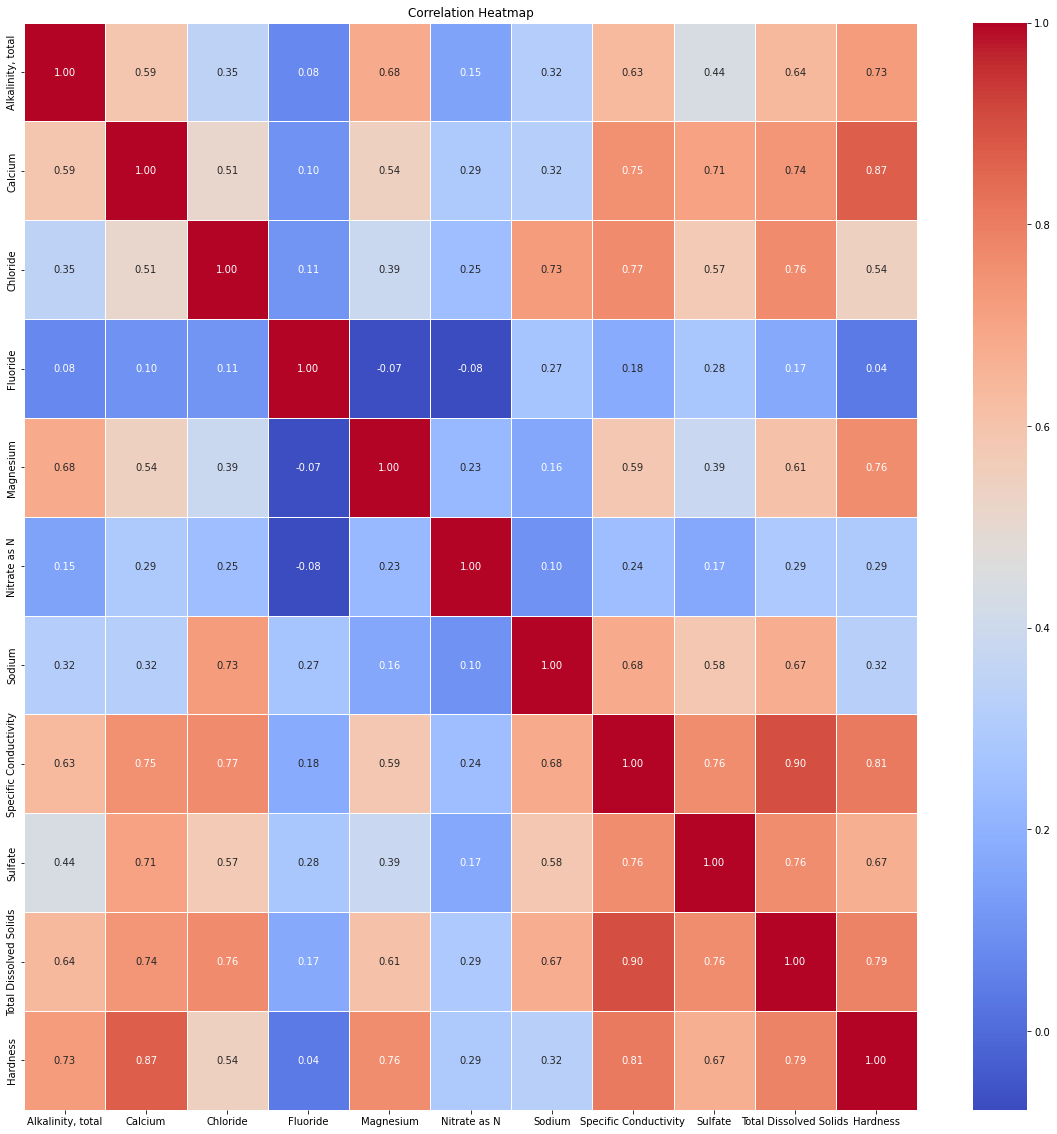

In [60]:
# Calculate the correlation matrix
correlation_matrix = clean_train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [61]:
# correlation_matrix.loc[abs(correlation_matrix["Hardness"]) > 0.5]["Hardness"]
# final_feat = correlation_matrix.loc[abs(correlation_matrix["Hardness"]) > 0.5]["Hardness"].index.tolist()
# clean_train_df = clean_train_df[final_feat]

In [62]:
clean_train_df.describe()

,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000,5770.000000
mean,154.255494,46.671512,3.201088,0.253165,2.529553,1.156416,3.511040,531.407192,3.352391,5.717488,181.621282
std,64.660236,28.259291,1.015936,0.196209,0.812991,0.669267,0.692113,266.130708,1.140360,0.496596,105.101574
min,21.000000,1.000000,0.457425,0.047837,0.049742,0.002297,0.832909,40.000000,0.131028,3.024320,3.500000
25%,110.000000,24.000000,2.397895,0.122218,2.054124,0.604316,3.044522,320.000000,2.553321,5.353040,99.000000
50%,150.000000,41.200000,3.218876,0.182322,2.639057,1.098612,3.496508,480.000000,3.367296,5.707110,160.000000
75%,190.000000,65.000000,3.970292,0.314811,3.091042,1.620376,3.970292,690.000000,4.219508,6.066108,250.000000
max,355.000000,140.000000,6.523562,2.302585,10.165890,4.044804,10.373522,1350.000000,6.311735,7.741099,487.000000


# Modelling

In [63]:
X = clean_train_df.drop(columns=['Hardness'])
y = clean_train_df['Hardness']

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# X_pca = pca.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [64]:

# best_params = {'n_estimators': 76, 'max_depth': 32, 'min_samples_split': 2, 'min_samples_leaf': 1, 'random_state' : 42} 

In [65]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_predtrain_rf = rf.predict(X_train)
print(r2_score(y_predtrain_rf, y_train))

0.9883435891538765


In [66]:
import catboost

cboost = catboost.CatBoostRegressor(random_state=42)
cboost.fit(X_train, y_train)

y_predtrain_cboost = cboost.predict(X_train)
print(r2_score(y_predtrain_cboost, y_train))

Learning rate set to 0.052136
0:	learn: 100.9608608	total: 3.52ms	remaining: 3.52s
1:	learn: 96.8418881	total: 6.13ms	remaining: 3.06s
2:	learn: 92.7685448	total: 8.1ms	remaining: 2.69s
3:	learn: 89.0318994	total: 10.1ms	remaining: 2.5s
4:	learn: 85.6349755	total: 11.9ms	remaining: 2.38s
5:	learn: 82.3312487	total: 14.1ms	remaining: 2.34s
6:	learn: 79.3228741	total: 16.1ms	remaining: 2.28s
7:	learn: 76.2780386	total: 18.9ms	remaining: 2.34s
8:	learn: 73.3517976	total: 20.5ms	remaining: 2.26s
9:	learn: 70.6214416	total: 22.1ms	remaining: 2.19s
10:	learn: 68.1138130	total: 24.2ms	remaining: 2.17s
11:	learn: 65.7407893	total: 26.2ms	remaining: 2.15s
12:	learn: 63.4823954	total: 27.9ms	remaining: 2.11s
13:	learn: 61.3446850	total: 30ms	remaining: 2.11s
14:	learn: 59.2541598	total: 32.1ms	remaining: 2.11s
15:	learn: 57.3005059	total: 33.9ms	remaining: 2.09s
16:	learn: 55.4904917	total: 35.6ms	remaining: 2.06s
17:	learn: 53.6870597	total: 37.7ms	remaining: 2.06s
18:	learn: 51.9680519	total: 

In [67]:
from sklearn.svm import SVR

svr = SVR()

svr.fit(X_train, y_train)

SVR()

In [68]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors = 15)

knn.fit(X_train, y_train) 
y_pred = knn.predict(X_val) 
r2 = r2_score(y_val, y_pred)

In [69]:
from sklearn.ensemble import BaggingRegressor

bag_knn = BaggingRegressor(estimator=knn, n_estimators=10, random_state=42)

bag_knn.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_knn = bag_knn.predict(X_train)
y_predval_bag_knn = bag_knn.predict(X_val)
r2train_bag_knn = r2_score(y_train, y_predtrain_bag_knn)
r2val_bag_knn = r2_score(y_val, y_predval_bag_knn)
print(f"bag_knn r2 train =  {r2train_bag_knn}, bag_knn r2 val = {r2val_bag_knn}, bag_knn r2 diff = {r2train_bag_knn-r2val_bag_knn}")

bag_knn r2 train =  0.849218719028709, bag_knn r2 val = 0.7999587896529372, bag_knn r2 diff = 0.04925992937577184


In [70]:
from sklearn.ensemble import BaggingRegressor

bag_svr = BaggingRegressor(estimator=svr, n_estimators=10, random_state=42)

bag_knn.fit(X_train, y_train)

# Predict with bagged
y_predtrain_bag_knn = bag_knn.predict(X_train)
y_predval_bag_knn = bag_knn.predict(X_val)
r2train_bag_knn = r2_score(y_train, y_predtrain_bag_knn)
r2val_bag_knn = r2_score(y_val, y_predval_bag_knn)
print(f"bag_knn r2 train =  {r2train_bag_knn}, bag_knn r2 val = {r2val_bag_knn}, bag_knn r2 diff = {r2train_bag_knn-r2val_bag_knn}")

bag_knn r2 train =  0.849218719028709, bag_knn r2 val = 0.7999587896529372, bag_knn r2 diff = 0.04925992937577184


In [71]:
from mlxtend.regressor import StackingCVRegressor

stack = StackingCVRegressor(regressors=(svr, bag_knn),
                            meta_regressor=svr, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=SVR(), random_state=42,
                    regressors=(SVR(),
                                BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=15),
                                                 random_state=42)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [72]:
from mlxtend.regressor import StackingCVRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

xgb = XGBRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

stacking_regressor_rf_xgb = StackingCVRegressor(regressors=(rf, xgb),
                            meta_regressor=xgb, cv=5,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stacking_regressor_rf_xgb.fit(X_train, y_train)

StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                callbacks=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                device=None,
                                                early_stopping_rounds=None,
                                                enable_categorical=False,
                                                eval_metric=None,
                                                feature_types=None, gamma=None,
                                                grow_policy=None,
                                                importance_type=None,
                                                interaction_constraints=None,
                                                learning_rate...
                                             learning_rate=None, max_bin=None,
                                             max_cat_threshold=None,
                                             max_cat_to_onehot=None,
                                             max_delta_step=None,
                                             max_depth=None, max_leaves=None,
                                             min_child_weight=None, missing=nan,
                                             monotone_constraints=None,
                                             multi_strategy=None,
                                             n_estimators=None, n_jobs=None,
                                             num_parallel_tree=None,
                                             random_state=42, ...)),
                    shuffle=False, store_train_meta_features=True,
                    use_features_in_secondary=True)

In [73]:
from sklearn.ensemble import VotingRegressor

voting = VotingRegressor(estimators=[('svr', svr), ('bag_knn', bag_knn), ('stack', stacking_regressor_rf_xgb)])

voting.fit(X_train, y_train)

VotingRegressor(estimators=[('svr', SVR()),
                            ('bag_knn',
                             BaggingRegressor(estimator=KNeighborsRegressor(n_neighbors=15),
                                              random_state=42)),
                            ('stack',
                             StackingCVRegressor(meta_regressor=XGBRegressor(base_score=None,
                                                                             booster=None,
                                                                             callbacks=None,
                                                                             colsample_bylevel=None,
                                                                             colsample_bynode=None,
                                                                             colsample_bytree=None,
                                                                             device=None,
                                                                             early_stopping_rounds=None,
                                                                             enable_ca...
                                                                          learning_rate=None,
                                                                          max_bin=None,
                                                                          max_cat_threshold=None,
                                                                          max_cat_to_onehot=None,
                                                                          max_delta_step=None,
                                                                          max_depth=None,
                                                                          max_leaves=None,
                                                                          min_child_weight=None,
                                                                          missing=nan,
                                                                          monotone_constraints=None,
                                                                          multi_strategy=None,
                                                                          n_estimators=None,
                                                                          n_jobs=None,
                                                                          num_parallel_tree=None,
                                                                          random_state=42, ...)),
                                                 shuffle=False,
                                                 store_train_meta_features=True,
                                                 use_features_in_secondary=True))])

# Submission

In [74]:
test_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0


In [75]:
test_pred = stacking_regressor_rf_xgb.predict(test_df[X_train.columns])
predicting_model = "stack"

submission_df = pd.DataFrame(test_df["id"])
submission_df["Hardness"] = test_pred

submission_df


c:\Users\Dama\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


,id,Hardness
0,6400,183.054977
1,6401,364.493713
2,6402,207.339417
3,6403,212.976700
4,6404,401.235413
...,...,...
1596,7996,169.792542
1597,7997,177.749756
1598,7998,234.169861
1599,7999,389.114075


In [76]:
from datetime import datetime
submission_df.to_csv(("submission-" + predicting_model + datetime.now().strftime("-%Y %m %d_%Hh %Mm %Ss") + ".csv") , index=False)